# Notebook présentant la méthode utilisée pour réduire les données avec une ACP

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## import des images et normalisation des données grâce à Standard Scaler

In [17]:
base = np.load("./descripteur_img.npy")
queries = np.load("./descripteur_queries.npy")
scaler = StandardScaler()
scaler.fit(base)

#np array contenant les données normalisées
Z = scaler.transform(base)
print(Z)

[[ 0.5186345   0.45883688  0.80803156 ... -0.03590943 -0.05170588
   0.15346777]
 [-0.68069035 -0.62725276 -0.7398418  ...  0.04267557  0.21944463
   0.07149704]
 [ 0.6639813   0.33443546  0.38170815 ... -0.11710391 -0.18388332
  -0.09648192]
 ...
 [-0.2377859  -0.35220212 -0.41045907 ... -0.4520472  -0.41217086
  -0.3944387 ]
 [-0.32879603 -0.36519706 -0.35208988 ... -0.50640905 -0.51747954
  -0.4836887 ]
 [-0.67493737 -0.6237077  -0.71863145 ... -0.57078    -0.558857
  -0.58604234]]


## Réalisation d'une ACP gardant 60 axes et calculs des valeurs propres et des composantes principales

In [18]:
#variable contenant l'ACP
pca = PCA(n_components=60)
pca.fit(Z)

print("Valeurs propres : ")
print(pca.explained_variance_)
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print("Composantes principales : ")
print(pca.components_)
print("Part d'inertie cumulée : ")
print(np.cumsum(pca.explained_variance_ratio_*100))

Valeurs propres : 
[134.62242   125.50333    62.54713    52.115757   33.062675   26.89414
  25.203661   24.142612   17.716223   14.860363   13.914422   13.001662
  11.064514   10.582261    9.962225    9.437127    8.688964    8.503243
   7.089859    6.787357    6.2623024   6.12078     5.7700567   5.5921593
   4.888992    4.7625756   4.523384    4.3010316   4.053797    3.871818
   3.5884337   3.4093137   3.2584932   3.2063546   3.0880804   2.9516456
   2.654027    2.5337744   2.3925807   2.2998717   2.2470737   2.1751196
   1.9793743   1.951313    1.8676559   1.7968873   1.6630859   1.6534477
   1.5567389   1.5544451   1.4820471   1.4111394   1.3024676   1.2885363
   1.2499468   1.2003586   1.171415    1.1623367   1.0695733   1.0655575]
Pourcentage de variance expliquée : 
[0.17526773 0.16339539 0.08143141 0.06785059 0.04304498 0.03501404
 0.03281317 0.03143177 0.02306512 0.01934702 0.01811548 0.01692713
 0.01440512 0.01377727 0.01297003 0.01228639 0.01131234 0.01107055
 0.00923043 0.008

## Traçage de la coube représentant la part d'inertie cumulée pour déterminer le nombre d'axes à garder 

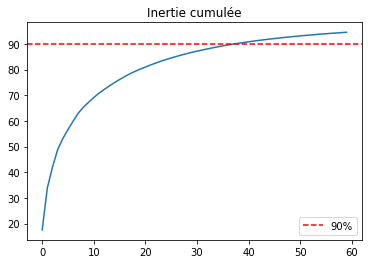

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.axhline(y=90, color='r', linestyle='--', label='90%')
plt.title('Inertie cumulée')
plt.legend()
plt.show()

# On conserve 40 axes pour avoir +90%  de part d'inertie expliquée

In [20]:
#variable contenant le PCA gardant 20 axes
pca2 = PCA(n_components=20)
pca2.fit(Z)

#variables contenant les données de dimensions réduites
base_reshaped = pca2.transform(Z)

## Réalisation de la diminution de dimensions pour les requêtes

In [21]:
scaler2 = StandardScaler()
scaler2.fit(base)
Z2 = scaler2.transform(queries)
pca3= PCA(n_components=20)
pca3.fit(Z2)

#variables contenant les données de dimensions réduites
queries_reshaped=pca3.transform(Z2)

## sauvegarde de nos données dans des fichiers numpy

In [22]:
np.save("descripteur_img_acp", base_reshaped)
np.save("queries_acp", queries_reshaped)
